In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/yusuf/OneDrive/Masaüstü/datathon2023/train.csv")

In [3]:
df=train.copy()

categorical_columns = [
    'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
    'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
    'Eğitime Devam Etme Durumu'
]

# Her bir kategorik sütun için histogram oluşturma
for col in categorical_columns:
    # Histogram figürünü oluştur
    fig = px.histogram(
        df,
        x=col,
        color="Öbek İsmi",
        barmode="group",
        title=f"'{col}' Değerlerinin Öbek İsmi'ne Göre Dağılımı"
    )
    
    # Histogram figürünü göster
    fig.show()

In [4]:
num_cols = ["Yıllık Ortalama Gelir","Yıllık Ortalama Satın Alım Miktarı","Yıllık Ortalama Sipariş Verilen Ürün Adedi","Yıllık Ortalama Sepete Atılan Ürün Adedi"]

sayisal_sutunlar = df[num_cols].columns

for sutun in sayisal_sutunlar:
    grafik = px.box(df, y=sutun, color="Öbek İsmi", title="{} ve Öbek İsmi".format(sutun))
    grafik.show()



In [5]:
# Bu kısımda her öbek için kategorik değişkenler içerisinden en çok bulunan iki değeri ve sayısal değişkenlerin ortalamaları alınarak o öbeği tanımlayan string oluşturulmuştur.

# Öbek isimlerini al
obek_isimleri = df['Öbek İsmi'].unique()

# Her öbek için ayrı bir result string oluştur ve sonuçları sakla
result_strings = []

# Her öbek için işlemleri yap
for obek in obek_isimleri:
    obek_df = df[df['Öbek İsmi'] == obek]
    
    # Öbek tanımını oluştur
    obek_desc = f"{obek} grubunda: "
    
    # Sütunları işle
    for column in obek_df.columns:
        if column not in ['Öbek İsmi', 'index']:
            if pd.api.types.is_numeric_dtype(obek_df[column]):
                # Sayısal sütunlar için ortalama hesapla
                mean_value = obek_df[column].mean()
                obek_desc += f"{column} ortalaması: {mean_value:.2f} "
            else:
                # Kategorik sütunlar için en çok bulunan iki değeri hesapla
                value_counts = obek_df[column].value_counts().head(2)
                obek_desc += f"{column} sütununda toplam {len(obek_df)} adet değişkende: "
                for value, count in value_counts.items():
                    obek_desc += f"{count} adet {value} bulunmaktadır. "
                
    result_strings.append(obek_desc)

# Her öbek için oluşturulan sonuçları göster
for result in result_strings:
    print(result)


obek_4 grubunda: Cinsiyet sütununda toplam 720 adet değişkende: 368 adet Erkek bulunmaktadır. 352 adet Kadın bulunmaktadır. Yaş Grubu sütununda toplam 720 adet değişkende: 412 adet 31-40 bulunmaktadır. 292 adet 18-30 bulunmaktadır. Medeni Durum sütununda toplam 720 adet değişkende: 556 adet Bekar bulunmaktadır. 164 adet Evli bulunmaktadır. Eğitim Düzeyi sütununda toplam 720 adet değişkende: 280 adet Üniversite Mezunu bulunmaktadır. 125 adet Yüksek Lisans Mezunu bulunmaktadır. İstihdam Durumu sütununda toplam 720 adet değişkende: 363 adet Düzenli ve Ücretli Bir İşi Var bulunmaktadır. 252 adet İşsiz veya Düzenli Bir İşi Yok bulunmaktadır. Yıllık Ortalama Gelir ortalaması: 817975.52 Yaşadığı Şehir sütununda toplam 720 adet değişkende: 609 adet Büyük Şehir bulunmaktadır. 43 adet Küçük Şehir bulunmaktadır. En Çok İlgilendiği Ürün Grubu sütununda toplam 720 adet değişkende: 156 adet Giyim bulunmaktadır. 153 adet Spor Malzemeleri bulunmaktadır. Yıllık Ortalama Satın Alım Miktarı ortalaması: 3

In [6]:
# Kategorik değişkenleri kodlayın
label_encoders = {}  # Her bir değişken için LabelEncoder nesnelerini depolamak için bir sözlük oluşturulur.

# Veri çerçevesinin sadece 'object' veri tipine sahip sütunlarını döngüyle gezin.
for sütun in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()  # Her bir kategorik değişken için bir LabelEncoder nesnesi oluşturulur.
    df[sütun] = le.fit_transform(df[sütun])  # Veri çerçevesindeki ilgili sütun, LabelEncoder ile dönüştürülür.
    label_encoders[sütun] = le  # Kullanılan LabelEncoder nesnesi sözlüğe eklenir.


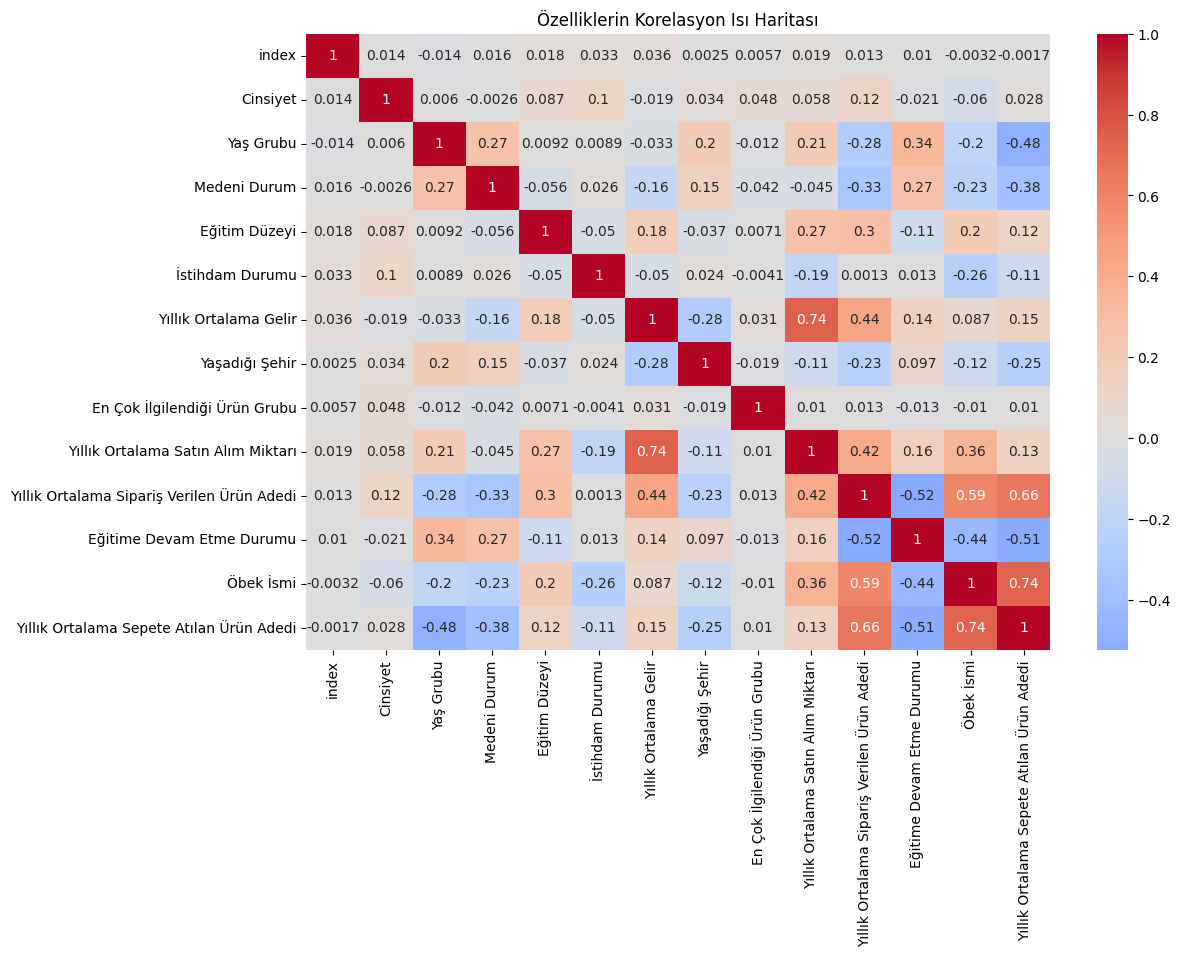

In [7]:
# Özellikler arasındaki ilişkileri gösteren bir ısı haritası oluşturun
korelasyon_matrisi = df.corr()  # Veri çerçevesinin özellikleri arasındaki korelasyon matrisini hesaplayın.
plt.figure(figsize=(12, 8))  # 12x8 büyüklüğünde bir çizim alanı oluşturun.
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', center=0)  # Isı haritasını çizin; değerleri gösterin, renk skalası 'coolwarm' ve merkezi 0 olarak ayarlanmış.
plt.title('Özelliklerin Korelasyon Isı Haritası')  # Çizimin başlığını belirleyin.
plt.show()  # Çizimi gösterin.


Yıllık Ortalama Sepete Atılan Ürün Adedi ile Öbek İsmi sıralaması arasında büyük bir benzerlik görülmektedir. Ayrıca Yıllık Ortalama Sipariş Verilen Ürün Adedi arasında da büyük bir korelasyon gözlenmiştir. sayısal değerlerin birbirleri arasındaki corelasyonları da aşikardır.

Makine Öğrenmesi Modelleri

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Veri Ön İşleme Random Forest için

In [9]:
# Copy the DataFrame
df = train.copy()

# Scaling process
scaler = StandardScaler()
columns_to_scale = ["Yıllık Ortalama Gelir", "Yıllık Ortalama Sepete Atılan Ürün Adedi",
                    "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Satın Alım Miktarı"]
scaled_numeric = scaler.fit_transform(df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_numeric, columns=["Scaled_Income", "Scaled_Avg_Items_In_Cart",
                                                  "Scaled_Avg_Items_Orders", "Scaled_Avg_Purchase_Quantity"])

# Combine engineered features
engineered_df = pd.concat([df, scaled_df], axis=1)

# Select features and target variable
features = engineered_df.drop(columns=['Öbek İsmi'])
target = engineered_df['Öbek İsmi']

# Convert categorical features using one-hot encoding
categorical_columns = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
                       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
                       'Eğitime Devam Etme Durumu']
features = pd.get_dummies(features, columns=categorical_columns)

In [10]:
df.head() # 14 adet sütun bulunmaktadır

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [11]:
features.head() # Ön işleme yöntemleri ile sütun sayısı 40'a çıkarılmıştır

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Scaled_Income,Scaled_Avg_Items_In_Cart,Scaled_Avg_Items_Orders,Scaled_Avg_Purchase_Quantity,Cinsiyet_Erkek,...,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Ediyor,Eğitime Devam Etme Durumu_Etmiyor
0,0,748266.440879,32010.900881,37.310644,102.936904,1.751048,0.624683,0.887949,1.091958,False,...,False,False,False,True,False,False,False,False,False,True
1,1,246298.609605,4145.729891,11.554851,82.176053,-0.533799,0.184927,-0.835505,-0.884593,True,...,False,True,False,False,False,False,False,True,False,True
2,2,268582.732360,9924.379414,55.353236,141.661426,-0.432366,1.444947,2.095272,-0.474698,True,...,False,True,False,False,False,True,False,False,True,False
3,3,327721.837865,6417.780714,15.417239,17.097397,-0.163178,-1.193570,-0.577053,-0.723430,True,...,False,False,True,False,False,True,False,False,False,True
4,4,397431.626948,7886.663061,14.689837,20.470459,0.154125,-1.122122,-0.625727,-0.619238,True,...,False,False,False,False,False,True,False,False,False,True


In [19]:
# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Rastgele Orman sınıflandırıcısını başlat
clf = RandomForestClassifier(n_estimators=100, random_state=55)

# Modeli eğit
clf.fit(X_train, y_train)

# Tahminlerde bulun
predictions = clf.predict(X_test)

# Doğruluğu hesapla
accuracy = accuracy_score(y_test, predictions)

print("Doğruluk:", accuracy)

Doğruluk: 0.9615384615384616


Veri Ön İşleme XGBOOST için

In [20]:
df_copy = train.copy()

# Özellikleri ve hedef değişkeni seç
features_xgb = df_copy.drop(columns=['Öbek İsmi'])
target_xgb = df_copy['Öbek İsmi']

# Kategorik özellikleri tek-etiket kodlaması ile sayısal değerlere dönüştür
features_xgb = pd.get_dummies(features_xgb, columns=['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu'])

# Hedef etiketlerini sayısal olarak kodla
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target_xgb)

In [25]:
# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(features_xgb, target, test_size=0.2, random_state=42)

# XGBoost sınıflandırıcısını başlat
clf_xgb = xgb.XGBClassifier(n_estimators=100)

# Modeli eğit
clf_xgb.fit(X_train, y_train)

# Tahminlerde bulun
predictions = clf_xgb.predict(X_test)

# Doğruluğu hesapla
accuracy = accuracy_score(y_test, predictions)

print("Doğruluk:", accuracy)

Doğruluk: 0.9597069597069597


Submisson part

In [26]:
test = pd.read_csv("C:/Users/yusuf/OneDrive/Masaüstü/datathon2023/test_x.csv")

# Scaling process
scaler = StandardScaler()
columns_to_scale = ["Yıllık Ortalama Gelir", "Yıllık Ortalama Sepete Atılan Ürün Adedi",
                    "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Satın Alım Miktarı"]
scaled_numeric = scaler.fit_transform(test[columns_to_scale])
scaled_test = pd.DataFrame(scaled_numeric, columns=["Scaled_Income", "Scaled_Avg_Items_In_Cart",
                                                  "Scaled_Avg_Items_Orders", "Scaled_Avg_Purchase_Quantity"])

# Combine engineered features
engineered_test = pd.concat([test, scaled_test], axis=1)
target = engineered_df['Öbek İsmi']

# Convert categorical features using one-hot encoding
categorical_columns = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
                       'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu',
                       'Eğitime Devam Etme Durumu']
engineered_test = pd.get_dummies(engineered_test, columns=categorical_columns)

In [27]:
# Modeli eğit
clf.fit(features, target)

# Tahminlerde bulun
predictions = clf.predict(engineered_test)
